# Regression linéaire à une variable

In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})



#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)


from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt, log
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge



In [3]:
data = pd.read_csv('/Users/lu/Documents/SIMPLON/Projet/Projet_Python/predict_house_price/data/train.csv', sep=',', encoding='latin1')
data.shape




(1460, 81)

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 1. Choose the variables
1) two building variables : 'OverallQual' and 'YearBuilt'  

2) two 'space' variables : 'GrLivArea', 'LotArea'

3) two 'location' variables : 'MSZoning' and 'Condtion1'

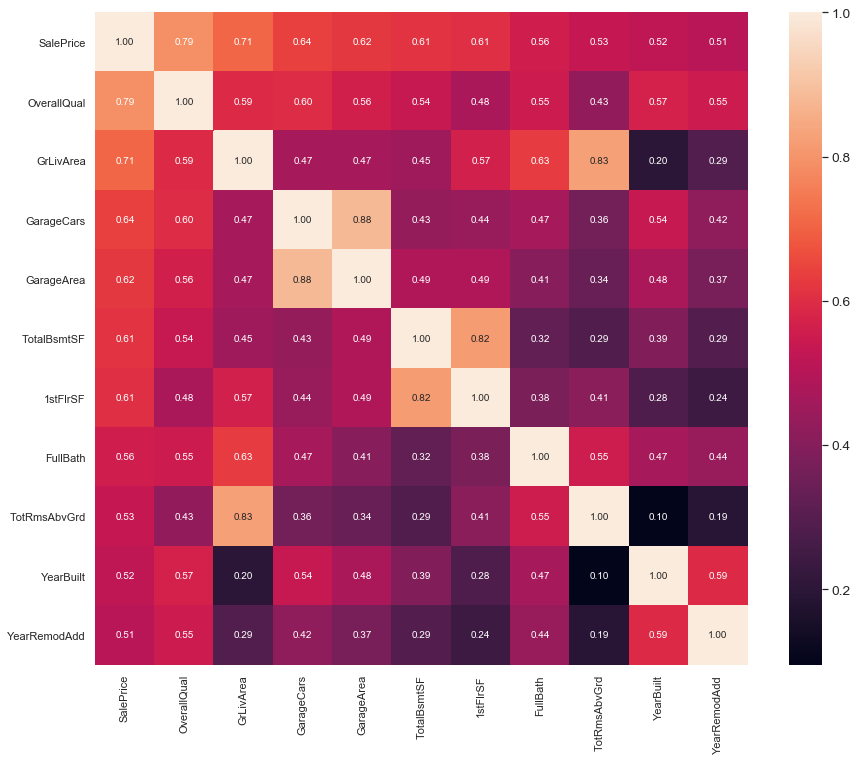

In [7]:
corrmat = data.corr()
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
fig.savefig('/Users/lu/Documents/SIMPLON/Projet/Projet_Python/predict_house_price/images/correlation.png')

# 2. Cleaning data

In [8]:
data = data.drop_duplicates()


In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/1460).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [17]:
data1 = data.copy()

In [18]:
data1.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
data1.drop(['LotFrontage', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
               'BsmtExposure', 'BsmtFinType2',  'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea',
              'MasVnrType', 'Electrical' ], axis=1, inplace=True)


# 3. Analyse et Visualize data

## 3.1. SalePrice


In [10]:
data['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

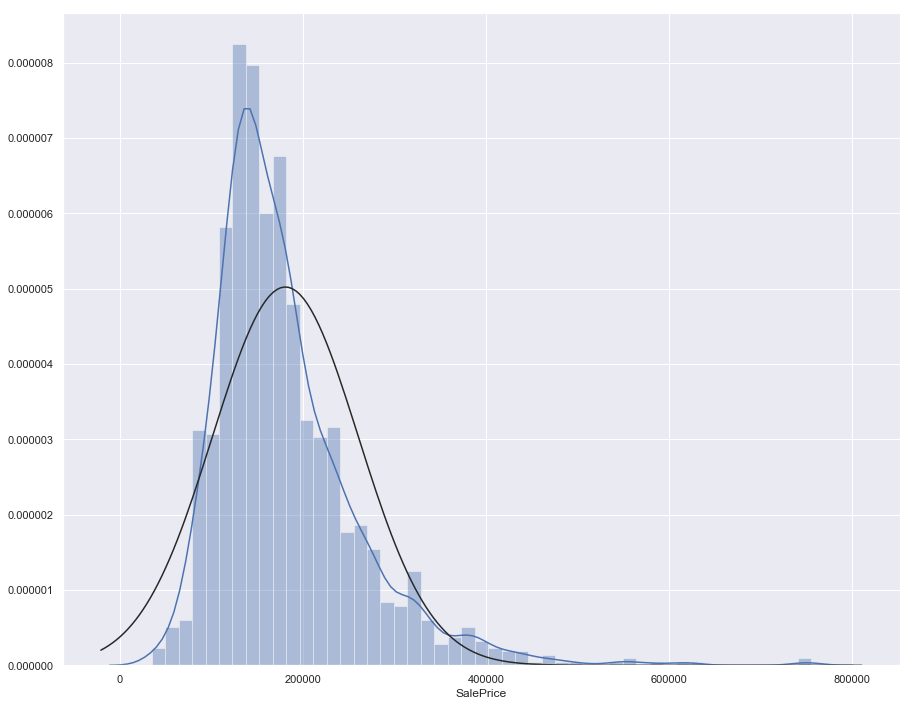

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.distplot(data['SalePrice'], fit=norm)


In [12]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [13]:
data[data['SalePrice'] < 50000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900


### The density of Log('SalePrice') 


 mu = 12.02 and sigma = 0.40



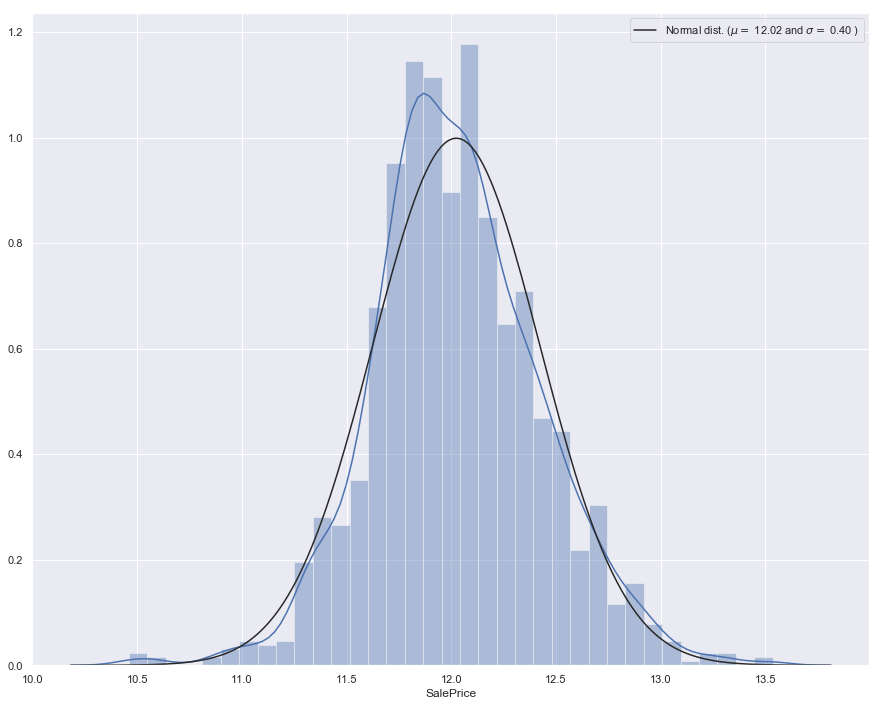

In [14]:
(mu, sigma) = norm.fit(np.log(data['SalePrice']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.distplot(np.log(data['SalePrice']), fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


In [11]:
print("Skewness: %f" % np.log(data['SalePrice']).skew())
print("Kurtosis: %f" % np.log(data['SalePrice']).kurt())

Skewness: 0.121335
Kurtosis: 0.809532


In [12]:
data[data['SalePrice'] > 500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## 3.2. Paire plot entre des variables

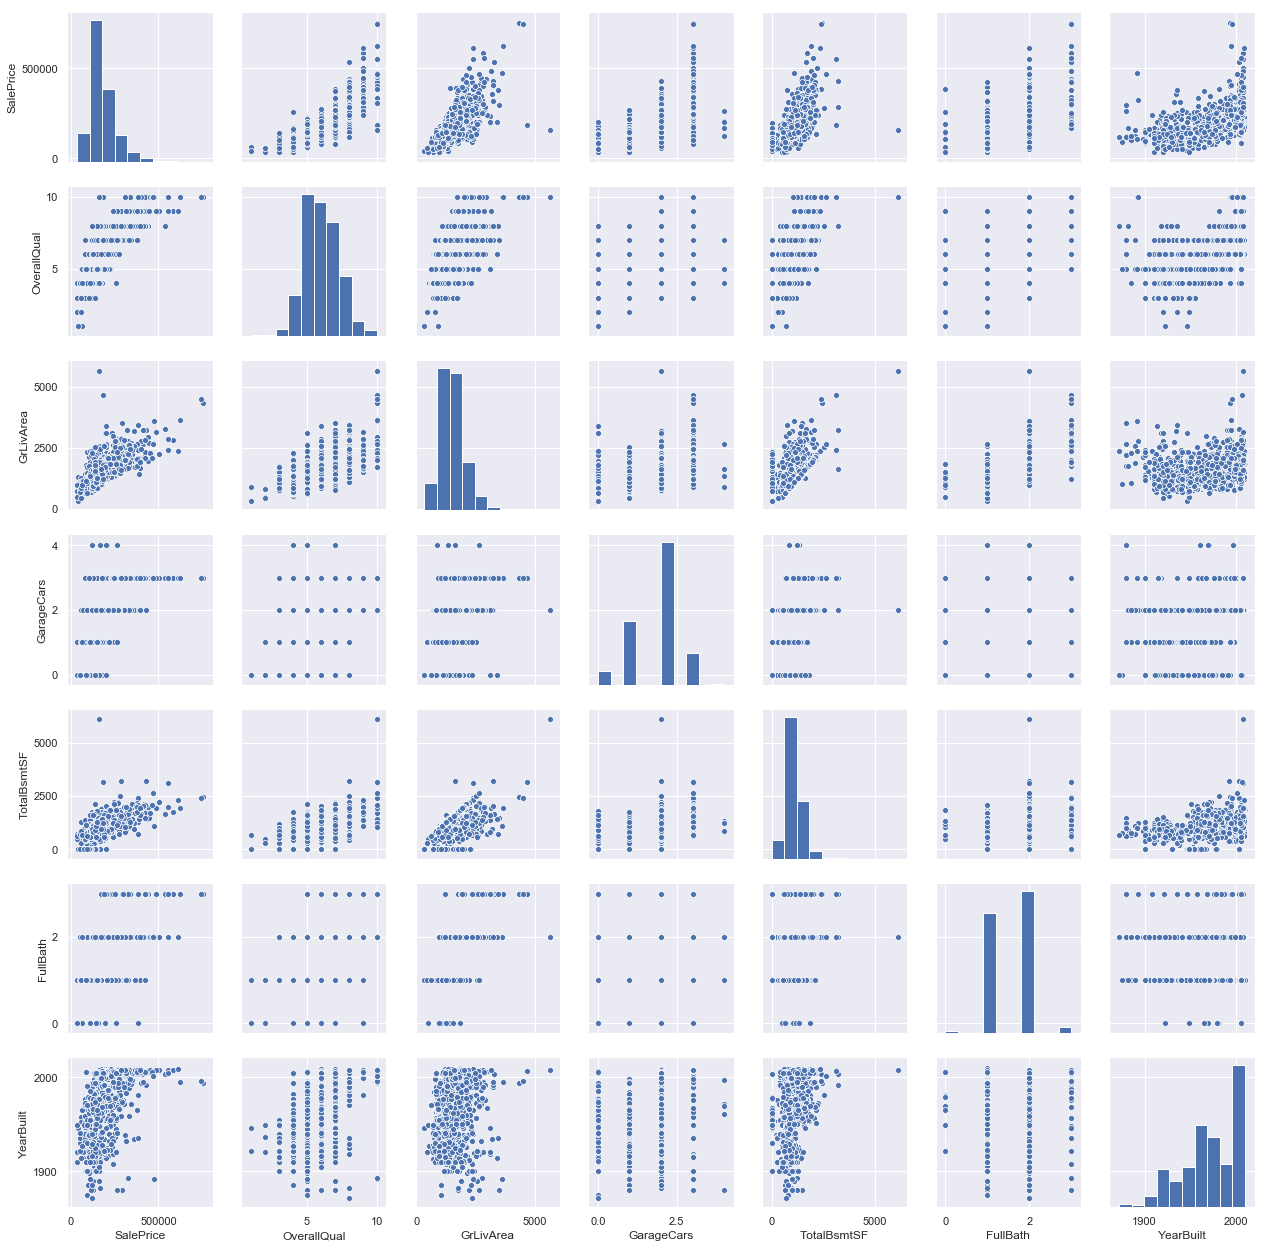

In [15]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
sns.set(font_scale=1.7)
plt.show()

## 3.3 Column 'GrLivArea'

In [56]:
GrLivArea = data1['GrLivArea']
GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

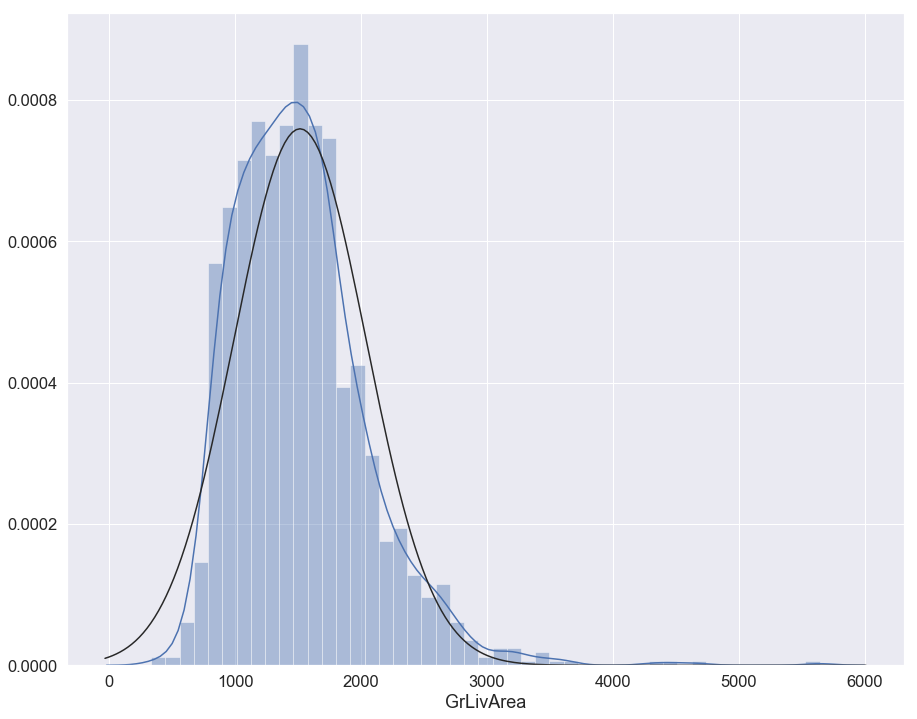

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.distplot(data1['GrLivArea'], fit=norm)
sns.set(font_scale=1.25)



### Density nearly normal if we take the log of column 'GrLivArea'


 mu = 7.27 and sigma = 0.33



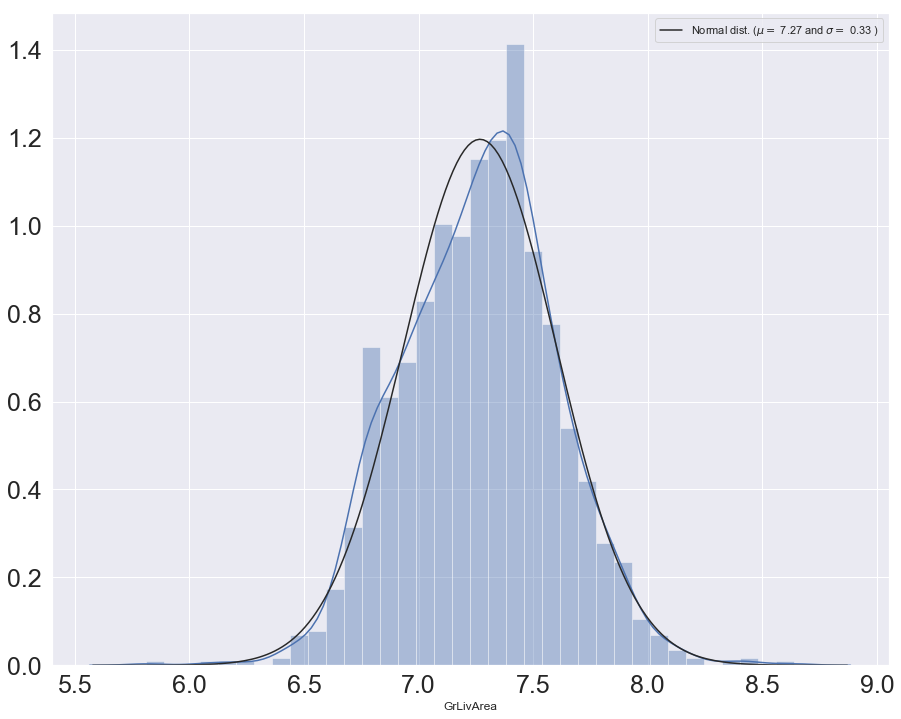

In [64]:
(mu, sigma) = norm.fit(np.log(data1['GrLivArea']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.distplot(np.log(data1['GrLivArea']), fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')



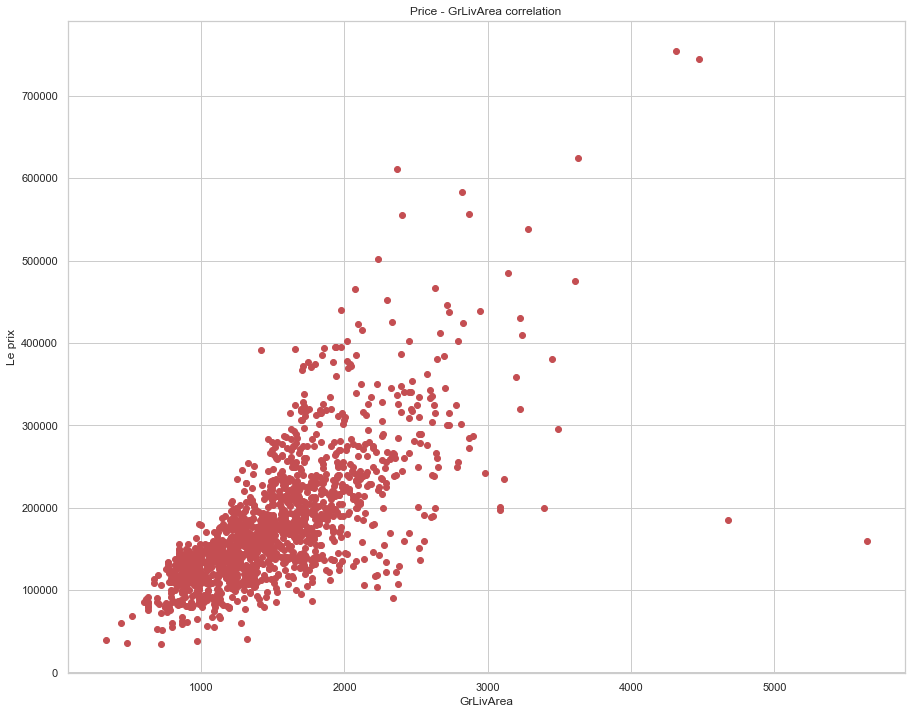

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
plt.scatter(data1['GrLivArea'], data1['SalePrice'], color='r')
title = ax.set_title('Price - GrLivArea correlation')
ax.set_xlabel('GrLivArea')
ax.set_ylabel('Le prix')
sns.set(font_scale=1.5)

plt.show()



## 3.4 Column 'LotArea'

In [41]:
LotArea = data1['LotArea']
LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

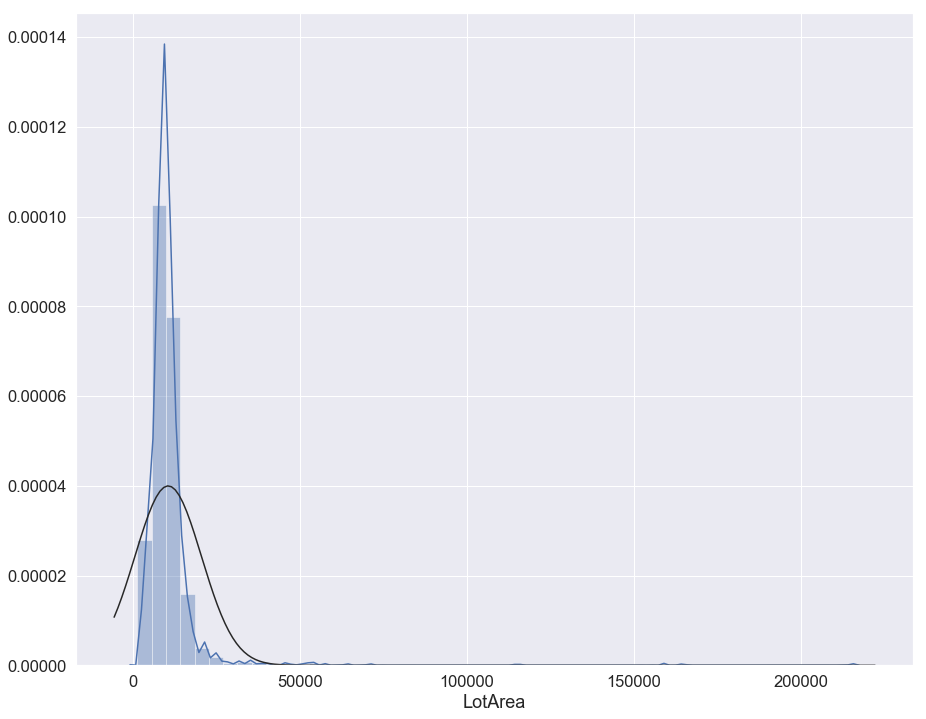

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.distplot(data1['LotArea'], fit=norm)
sns.set(font_scale=1.25)


#### Take sqrt of column 'LotArea'


 mu = 9.11 and sigma = 0.52



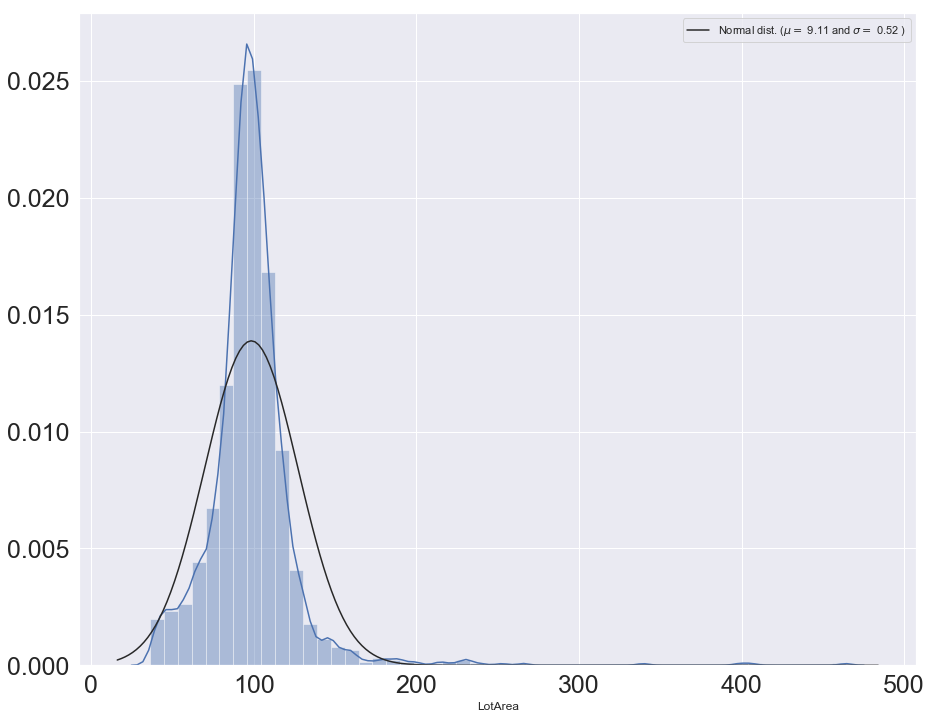

In [65]:
(mu, sigma) = norm.fit(np.log(data1['LotArea']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.distplot(np.sqrt(data1['LotArea']), fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


In [66]:
print("Skewness: %f" % np.sqrt(data1['LotArea']).skew())
print("Kurtosis: %f" % np.sqrt(data1['LotArea']).kurt())

Skewness: 4.139714
Kurtosis: 40.526117


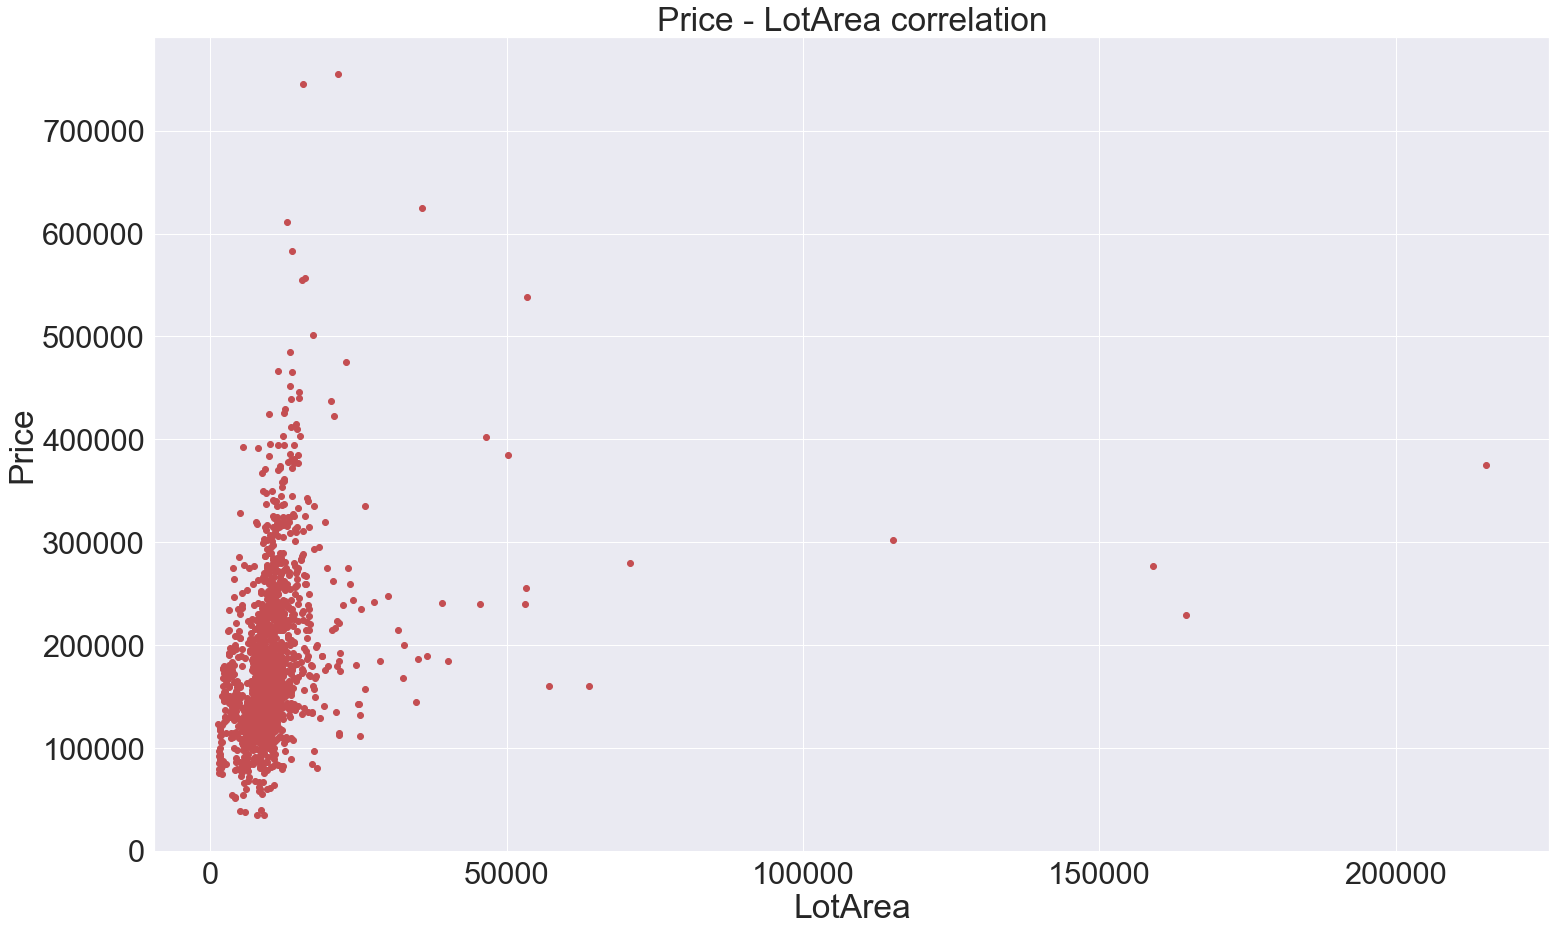

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
plt.scatter(data1['LotArea'], data1['SalePrice'], color='r')
title = ax.set_title('Price - LotArea correlation')
ax.set_xlabel('LotArea')
ax.set_ylabel('Price')
sns.set(font_scale=2.8)

plt.show()





## 3.5 Column 'OverallQual'

In [61]:
OverallQual = data1['OverallQual']

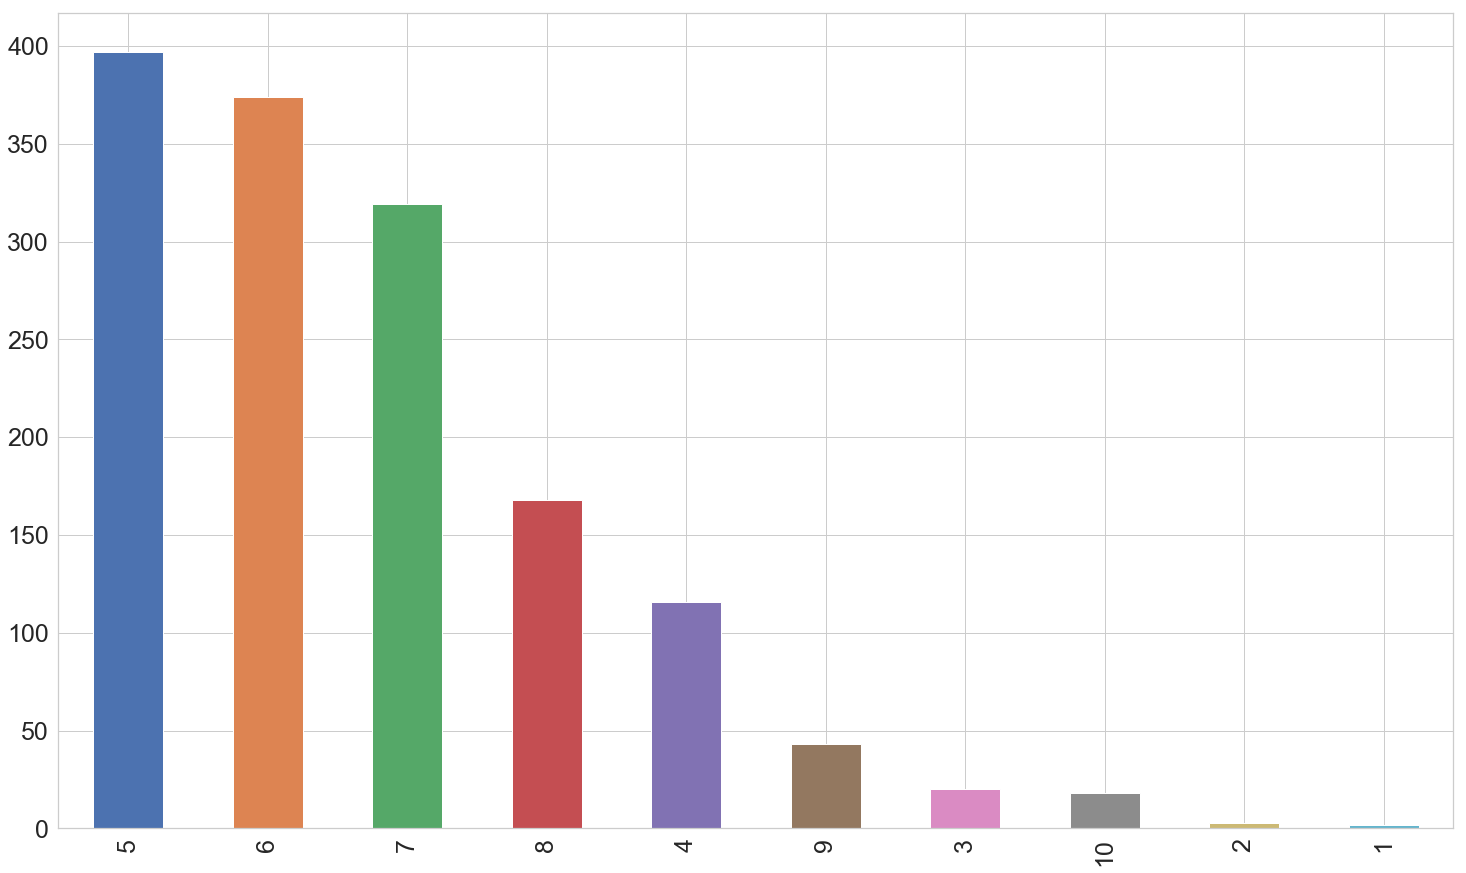

In [77]:
fig, ax = plt.subplots(figsize=(25,15))
OverallQual.value_counts().plot(kind = 'bar')
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)

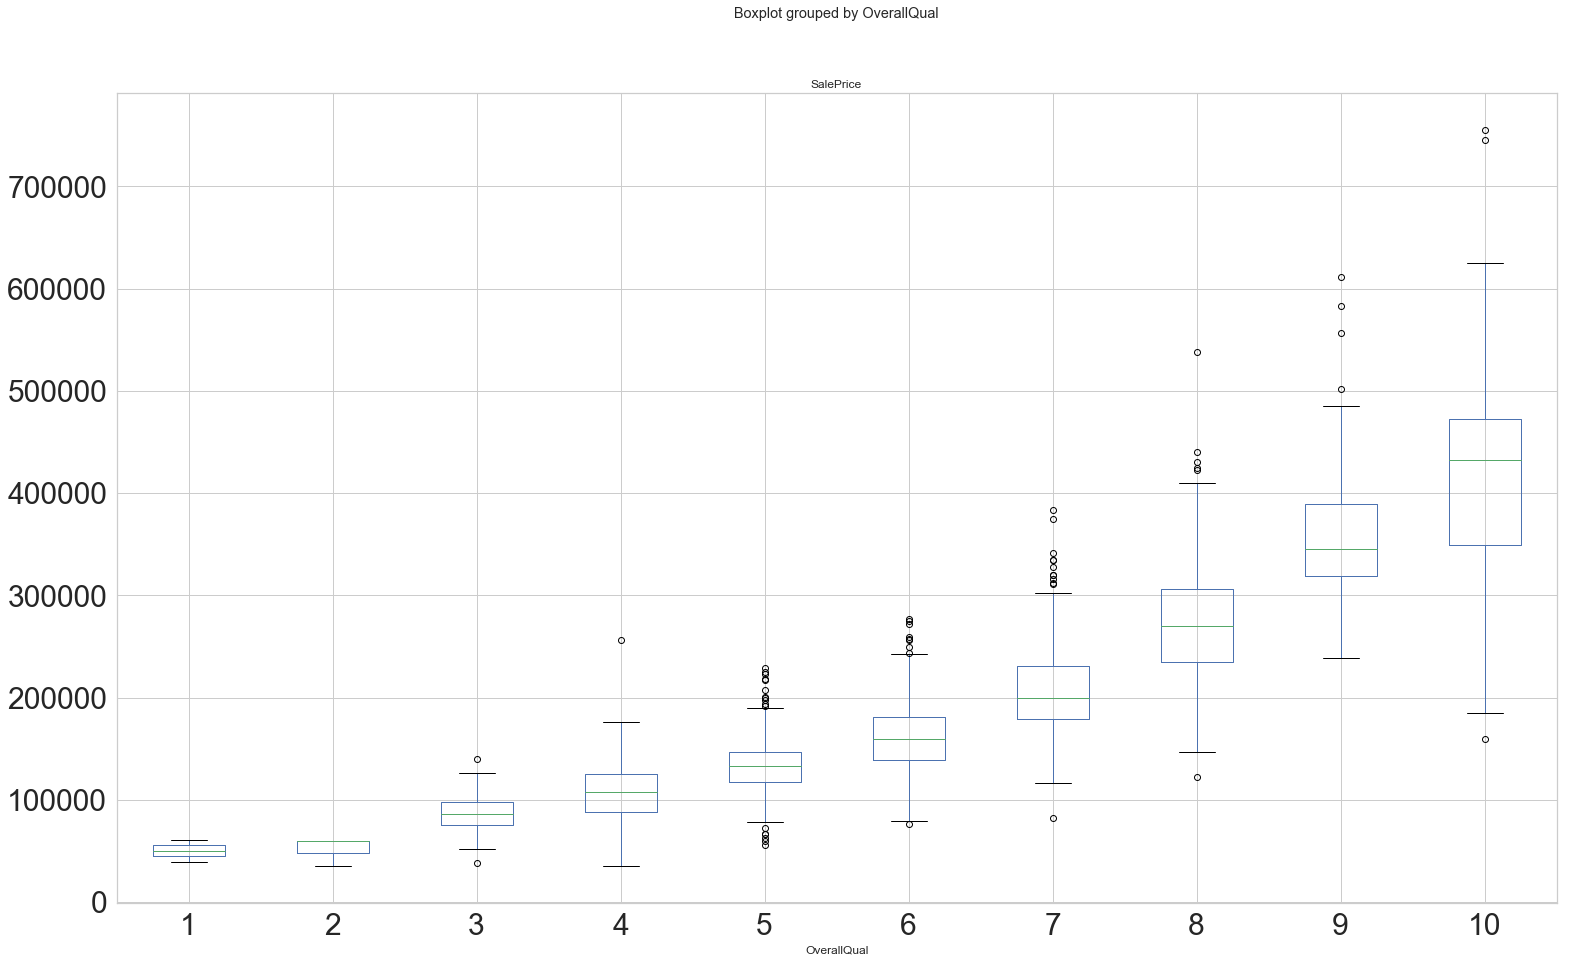

In [76]:
fig, ax = plt.subplots(figsize=(25,15))
data1.boxplot(column=['SalePrice'], by='OverallQual', ax=ax)
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)

## 3.6. Column 'GarageCars'

In [20]:
GarageCars = data1['GarageCars']

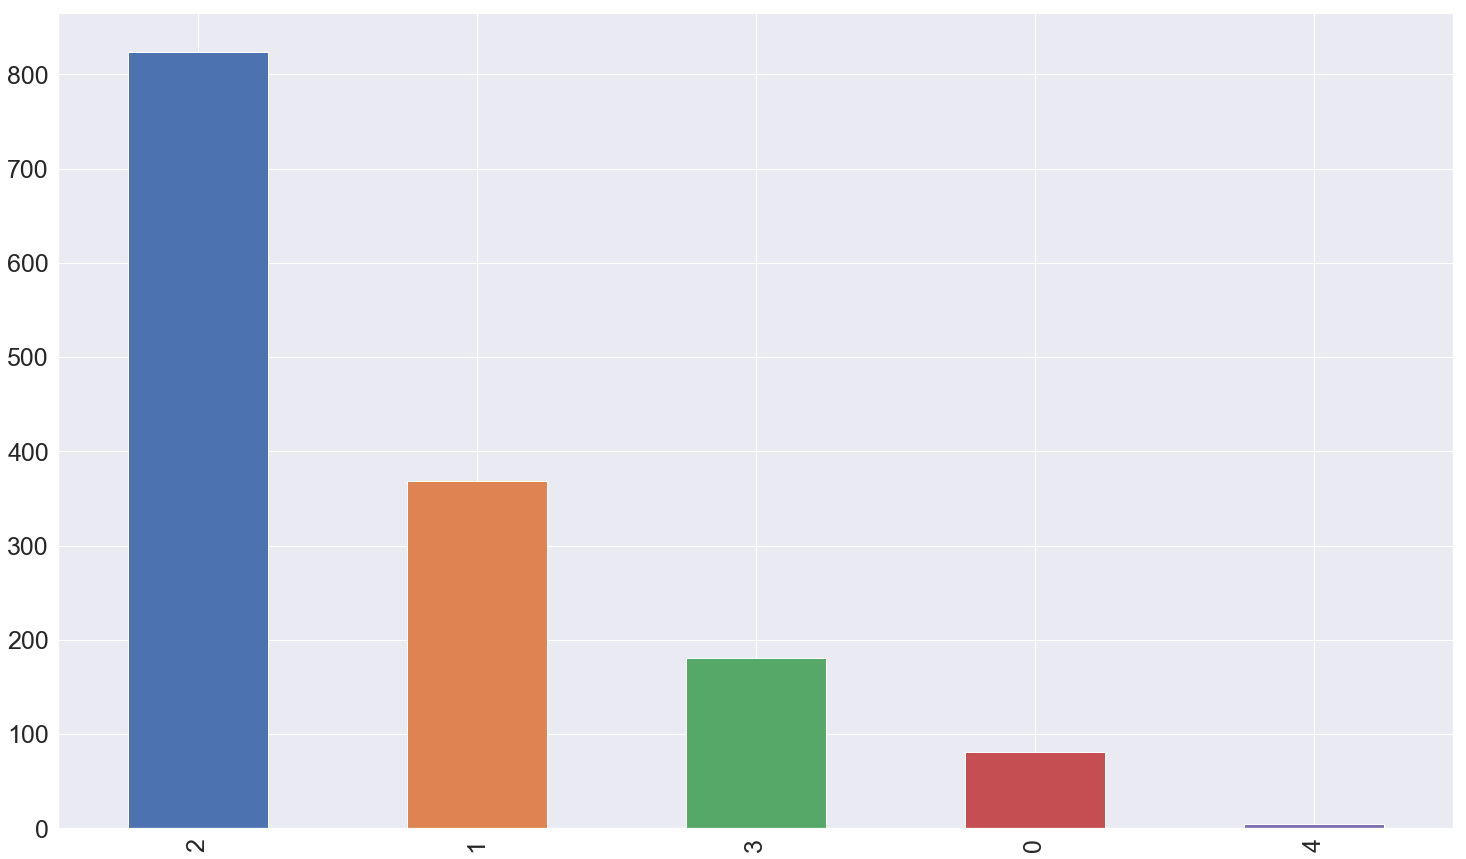

In [24]:
fig, ax = plt.subplots(figsize=(25,15))
GarageCars.value_counts().plot(kind = 'bar')
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)


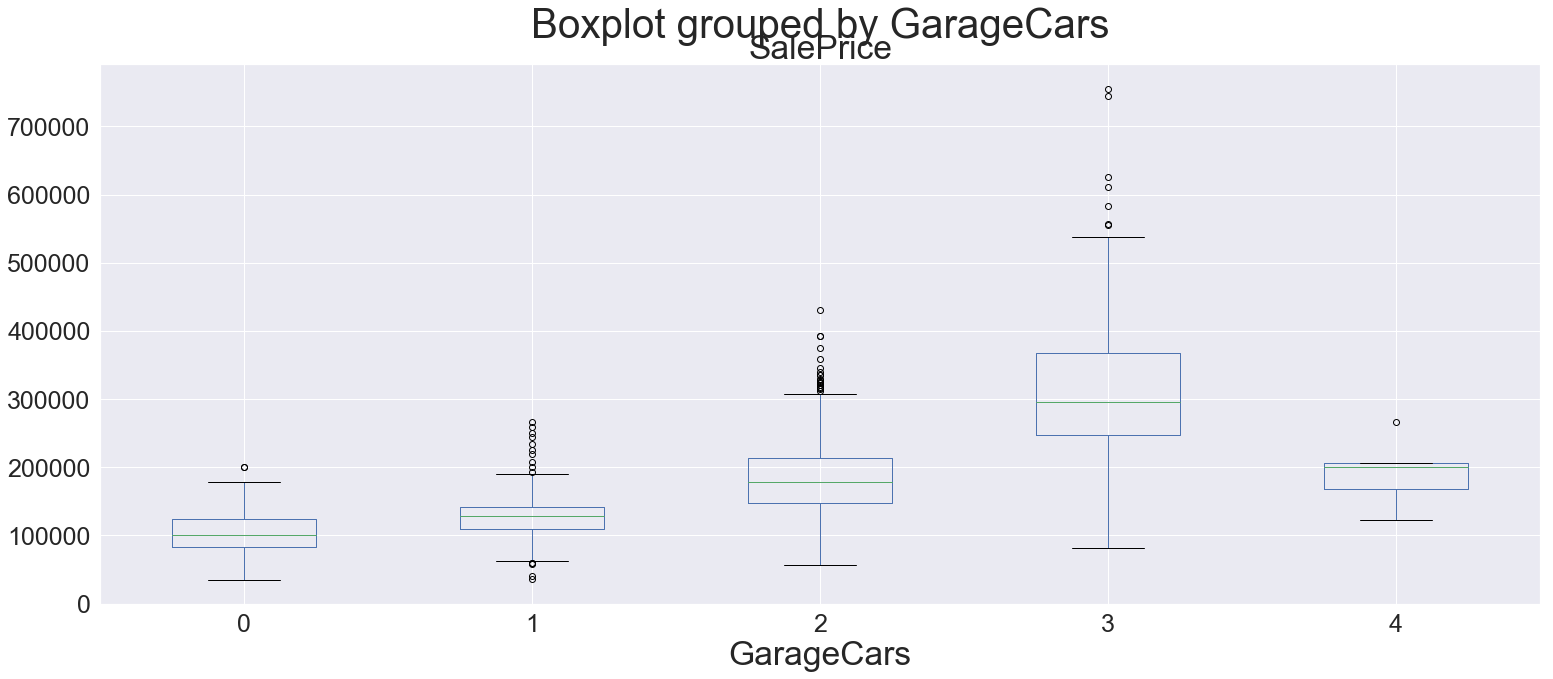

In [90]:
fig, ax = plt.subplots(figsize=(25,10))
data1.boxplot(column=['SalePrice'], by='GarageCars', ax = ax)
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)


## 3.7 'FullBath'

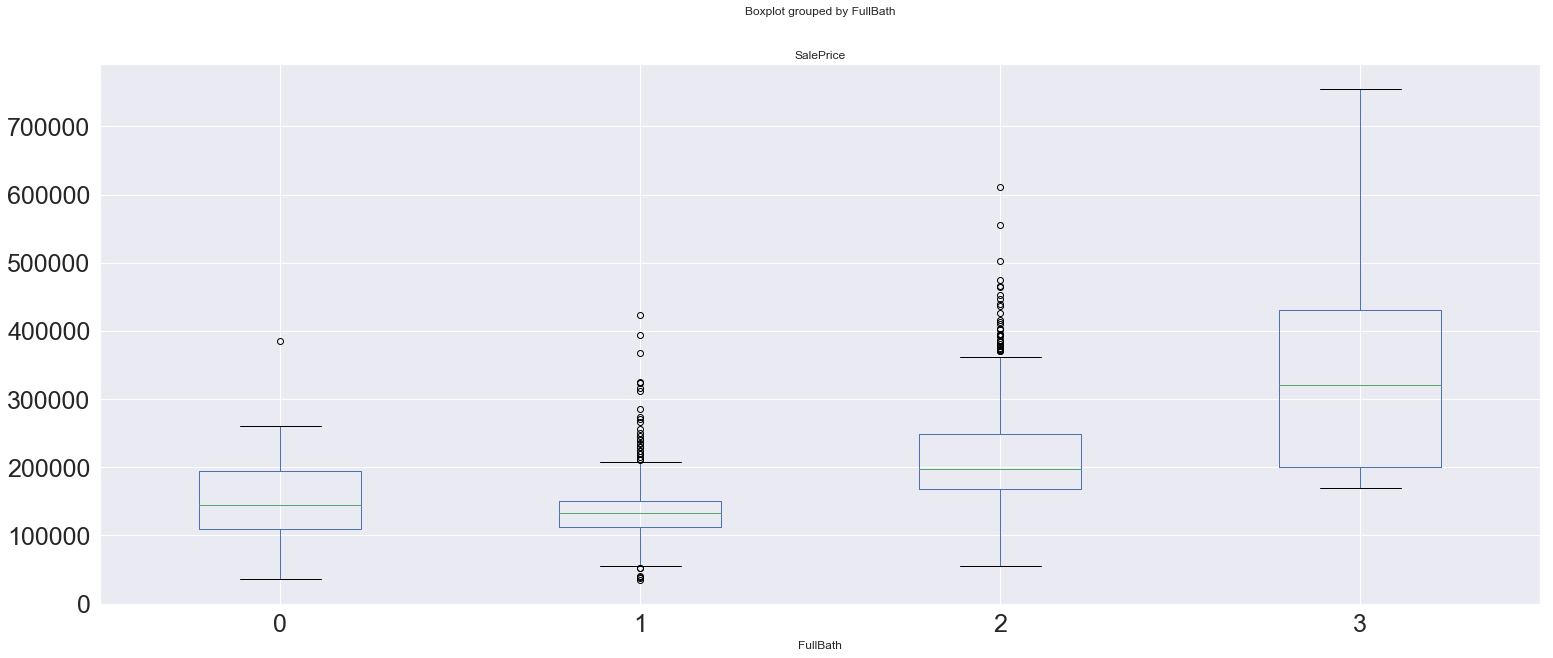

In [20]:
fig, ax = plt.subplots(figsize=(25,10))
data1.boxplot(column=['SalePrice'], by='FullBath', ax = ax)
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)



In [21]:
data1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# 4. TEST MODEL

In [27]:
df_train = data1.copy()
df_train['LotArea'] = df_train['LotArea'].apply(lambda x: float(x))
df_train['SalePrice'] = np.log(df_train['SalePrice']) 
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_train['LotArea'] = np.sqrt(df_train['LotArea'])
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'] +1)


## 4.1 One hot coding, normalize and split data

In [28]:
df_train = pd.get_dummies(df_train)

In [29]:
price_log = df_train['SalePrice']
price_true = data1['SalePrice']
price_log_true  = np.column_stack((price_log,price_true))

In [30]:
num_cols = ['LotArea', 'GrLivArea', 'YearBuilt']
minmaxScaler = MinMaxScaler()
df_train[num_cols] = minmaxScaler.fit_transform(df_train[num_cols])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_train, price_log_true, random_state = 42)

## 4.2 Test model

## Test model with the following variables:
1.'GrLivArea'

2.'LotArea', 'GrLivArea'

3.'LotArea', 'OverallQual', 'GrLivArea'

4.'LotArea', 'OverallQual', 'GrLivArea', 'Condition1'

5.'LotArea', 'OverallQual', 'GrLivArea', 'Condition1', 'MSZoning'

6.'LotArea', 'OverallQual', 'GrLivArea', 'Condition1', 'MSZoning', 'GarageCars'
add 'YearBuilt'

In [121]:
def test_model(X_train_xx, X_test_xx, y_train_xx, y_test_xx, model):
    model.fit(X_train_xx, y_train_xx[:,0]) # y_train_xx[:,0] price_log
    # calculating the R2-Score
    price_test_predict = np.exp(model.predict(X_test_xx)) # price_true_predict
    R2 = r2_score( y_test_xx[:,1], price_test_predict)
    print(f"Score for model : %0.2f" % R2)
    # MSE pour predict
    mse_test = sqrt(mean_squared_error(y_test_xx[:,1], price_test_predict))
    print(f"MSE for test : %0.2f" % mse_test)
    # Calculating the MSE and ABS error
    price_train_predict = np.exp(model.predict(X_train_xx))
    mse = sqrt(mean_squared_error(y_train_xx[:,1], price_train_predict))
    print(f"MSE for train : %0.2f" % mse)
    abs_error = mean_absolute_error(y_train_xx[:,1], price_train_predict)
    print(f"ABS ERROR for train : %0.2f" % abs_error)
    ### ABS for test
    abs_error_test = mean_absolute_error(y_test_xx[:,1], price_test_predict)
    print(f"ABS ERROR for test : %0.2f" % abs_error_test)
    #Residual
    residual = price_train_predict - y_train_xx[:,1]
    #plot residual vers price_train_predict
    fig = plt.figure(figsize=(20, 15))
    plt.scatter(price_train_predict, residual)
    fig.savefig('residual.pdf')
    
    return (R2, mse, mse_test, abs_error, abs_error_test, residual)


In [122]:
def test_model_without_graph(X_train_xx, X_test_xx, y_train_xx, y_test_xx, model):
    model.fit(X_train_xx, y_train_xx[:,0]) # y_train_xx[:,0] price_log
    # calculating the R2-Score
    price_test_predict = np.exp(model.predict(X_test_xx)) # price_true_predict
    R2 = r2_score( y_test_xx[:,1], price_test_predict)
    print(f"Score for model : %0.2f" % R2)
    # MSE pour predict
    mse_test = sqrt(mean_squared_error(y_test_xx[:,1], price_test_predict))
    print(f"MSE for test : %0.2f" % mse_test)
    # Calculating the MSE and ABS error
    price_train_predict = np.exp(model.predict(X_train_xx))
    mse = sqrt(mean_squared_error(y_train_xx[:,1], price_train_predict))
    print(f"MSE for train : %0.2f" % mse)
    abs_error = mean_absolute_error(y_train_xx[:,1], price_train_predict)
    print(f"ABS ERROR for train : %0.2f" % abs_error)
    ### ABS for test
    abs_error_test = mean_absolute_error(y_test_xx[:,1], price_test_predict)
    print(f"ABS ERROR for test : %0.2f" % abs_error_test)
    #Residual
    residual = price_train_predict - y_train_xx[:,1]
    #plot residual vers price_train_predict
    #fig = plt.figure(figsize=(20, 15))
    #plt.scatter(price_train_predict, residual)
    #fig.savefig('residual.pdf')
    
    return (R2, mse, mse_test, abs_error, abs_error_test, residual)



## Models choosen

In [86]:
reg = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = linear_model.Lasso(alpha=0.01)

## 1.  Model with 'GrLivArea' # Surface habitable au-dessus du sol

In [123]:
X_train_1 = X_train[['GrLivArea']]
X_test_1 = X_test[['GrLivArea']]

In [124]:
reg.fit(X_train_1, y_train[:,0]) # y_train_xx[:,0] price_log
price_test_predict = np.exp(reg.predict(X_test_1)) # price_true_predict
R2 = r2_score( y_test[:,1], price_test_predict)
print(f"Score for model : %0.2f" % R2)

#### MSE predict
mse_predict = sqrt(mean_squared_error(y_test[:,1], price_test_predict))
print(f"MSE for test : %0.2f" % mse_predict)
        
    
price_train_predict = np.exp(reg.predict(X_train_1))
mse = sqrt(mean_squared_error(y_train[:,1], price_train_predict))
print(f"MSE for train : %0.2f" % mse)

abs_error = mean_absolute_error(y_train[:,1], price_train_predict)
print(f"ABS ERROR for model : %0.2f" % abs_error)

abs_error_test = mean_absolute_error(y_test[:,1], price_test_predict)
print(f"ABS ERROR for test : %0.2f" % abs_error_test)


Score for model : 0.53
MSE for test : 57360.75
MSE for train : 56448.32
ABS ERROR for model : 38081.50
ABS ERROR for test : 37277.51


### Plot 'GrLivArea' vers Log('SalePrice') and fitted line

In [125]:
max_data = max(X_train_1['GrLivArea'])
min_data = min(X_train_1['GrLivArea'])
x0 = np.linspace(min_data, max_data, 5)
y0 = reg.intercept_ + reg.coef_[0]*x0

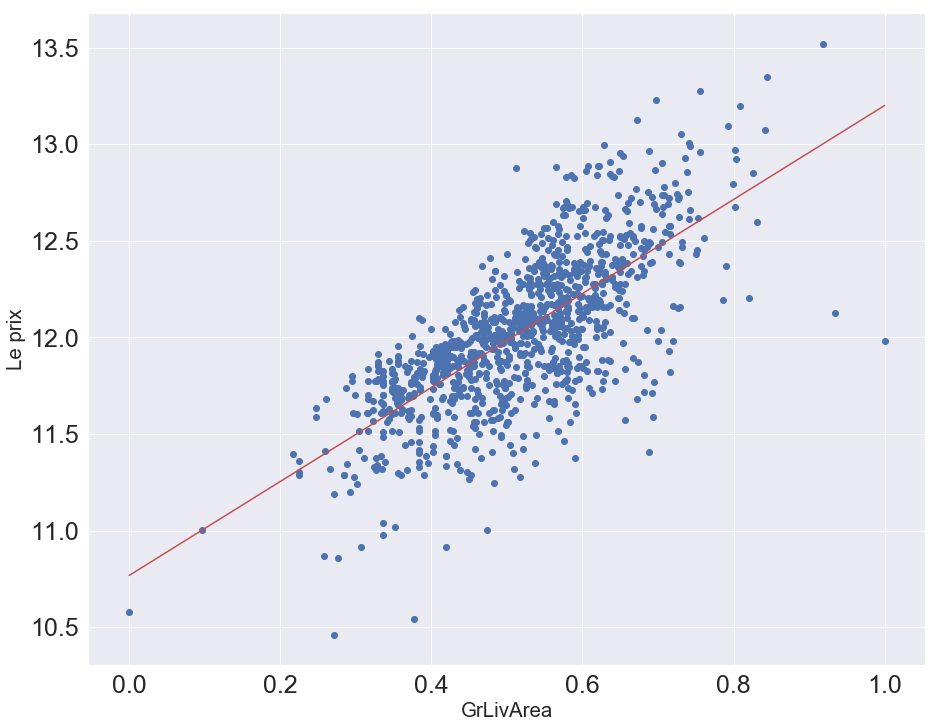

In [126]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
plt.scatter(X_train_1['GrLivArea'], y_train[:,0], color='b')
ax.set_xlabel('GrLivArea')
ax.set_ylabel('Le prix')
plt.plot(x0, y0, color = 'r')

## 2. 'LotArea', 'GrLivArea'

In [127]:
X_train_2 = X_train[['LotArea', 'GrLivArea']]
X_test_2 = X_test[['LotArea', 'GrLivArea']]


In [128]:
(R2_2, mse_2, mse_test_2, abs_error_2, abs_error_test_2, residual_2) = test_model_without_graph(X_train_2, X_test_2, y_train, y_test, reg)

Score for model : 0.54
MSE for test : 56755.47
MSE for train : 56354.11
ABS ERROR for train : 37554.59
ABS ERROR for test : 36757.46


In [129]:
X_train_22 = X_train[['TotalBsmtSF', 'GrLivArea']]
X_test_22 = X_test[['TotalBsmtSF', 'GrLivArea']]


In [130]:
(R2_22, mse_22, mse_test_22, abs_error_22, abs_error_test_22, residual_22) = test_model_without_graph(X_train_22, X_test_22, y_train, y_test, reg)

Score for model : 0.58
MSE for test : 54226.13
MSE for train : 53743.48
ABS ERROR for train : 35455.37
ABS ERROR for test : 34804.99


## 3. 'LotArea', 'OverallQual', 'GrLivArea'

In [131]:
X_train_3 = X_train[['LotArea', 'GrLivArea', 'OverallQual']]
X_test_3 = X_test[['LotArea', 'GrLivArea', 'OverallQual']]

### R2, MSE, ABS ERROR and Residual plot

Score for model : 0.80
MSE for test : 37052.54
MSE for train : 40850.91
ABS ERROR for train : 24911.95
ABS ERROR for test : 24144.56


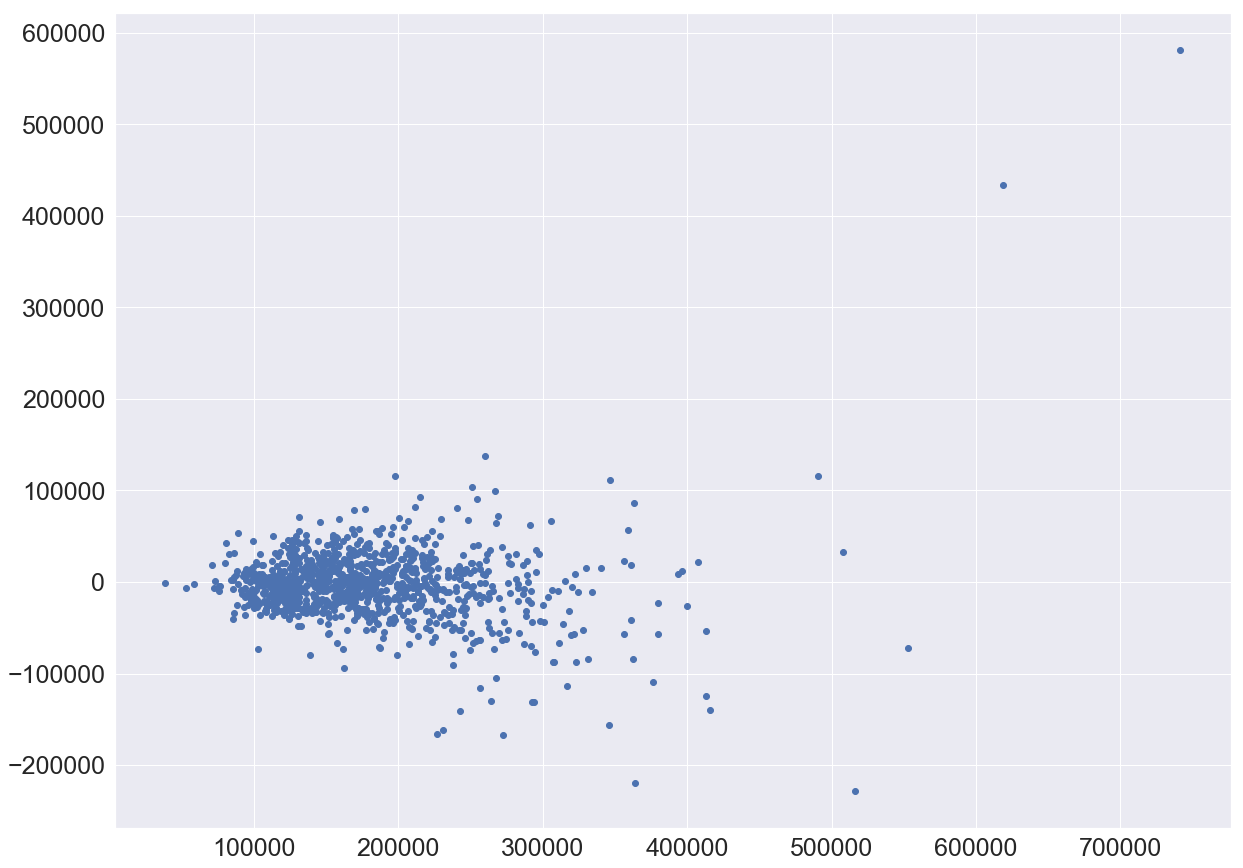

In [132]:
model = LinearRegression()
(R2_3, mse_3, mse_test_3, abs_error_3, abs_error_test_3, residual_3) = test_model(X_train_3, X_test_3, y_train, y_test, model)

In [134]:
X_train_33 = X_train[['TotalBsmtSF', 'GrLivArea', 'OverallQual']]
X_test_33 = X_test[['TotalBsmtSF', 'GrLivArea', 'OverallQual']]

In [135]:
(R2_33, mse_33, mse_test_33, abs_error_33, abs_error_test_33, residual_33) = test_model_without_graph(X_train_33, X_test_33, y_train, y_test, LinearRegression())

Score for model : 0.80
MSE for test : 37547.00
MSE for train : 39941.15
ABS ERROR for train : 25739.75
ABS ERROR for test : 24140.70


 ### Cut the outliers

In [136]:
mask = np.abs(residual_3) <= 300000

In [137]:
X_train_new_3 = X_train_3[mask]
y_train_new_3 = y_train[mask]

### R2, MSE, ABS ERROR , Residual plot after cutting outliers

Score for model : 0.81
MSE for test : 36189.90
MSE for train : 34242.65
ABS ERROR for train : 23908.39
ABS ERROR for test : 24045.17


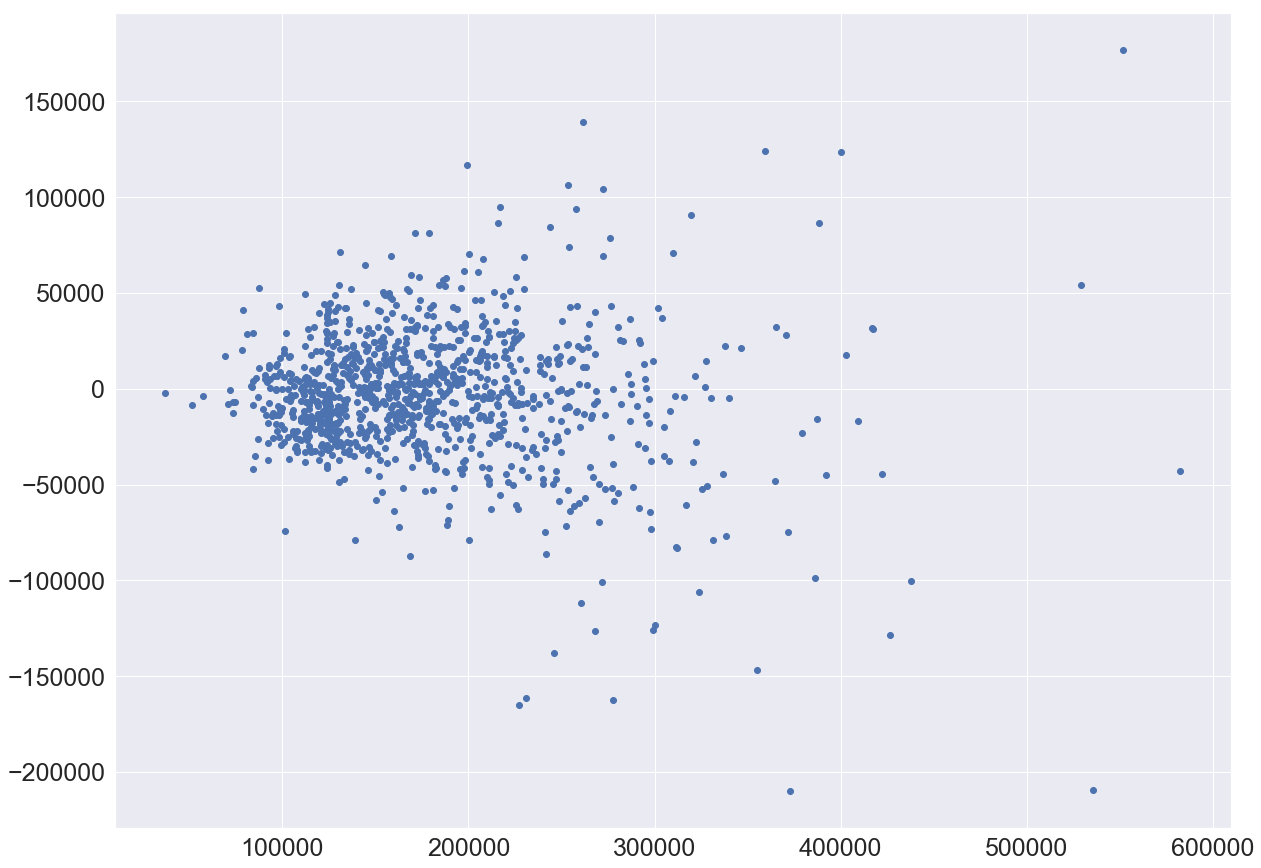

In [138]:
(R2_31, mse_31, mse_test_31, abs_error_31, abs_error_test_31, residual_31) = test_model(X_train_new_3, X_test_3, y_train_new_3, y_test, reg)

# Test with Lasso, KernelRidge, GradientBoostingRegressor model

In [139]:
lasso = linear_model.Lasso(alpha=0.0005)
(R2_311, mse_311, mse_test_311, abs_error_311, abs_error_test_311, residual_311) = test_model_without_graph(X_train_new_3, X_test_3, y_train_new_3, y_test, lasso)

Score for model : 0.81
MSE for test : 36416.48
MSE for train : 34108.54
ABS ERROR for train : 23885.80
ABS ERROR for test : 24036.38


In [140]:
ridge = Ridge(alpha=0.1)
(R2_311, mse_311, mse_test_311, abs_error_311, abs_error_test_311, residual_311) = test_model_without_graph(X_train_new_3, X_test_3, y_train_new_3, y_test, ridge)

Score for model : 0.81
MSE for test : 36227.15
MSE for train : 34201.21
ABS ERROR for train : 23899.90
ABS ERROR for test : 24042.67


In [141]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=4, coef0=2.5)
(R2_311, mse_311, mse_test_311, abs_error_311, abs_error_test_311, residual_311) = test_model_without_graph(X_train_new_3, X_test_3, y_train_new_3, y_test, KRR)

Score for model : 0.83
MSE for test : 34237.82
MSE for train : 32014.99
ABS ERROR for train : 22826.43
ABS ERROR for test : 23725.64


In [142]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
(R2_311, mse_311, mse_test_311, abs_error_311, abs_error_test_311, residual_311) = test_model_without_graph(X_train_new_3, X_test_3, y_train_new_3, y_test, GBoost)

Score for model : 0.82
MSE for test : 35095.78
MSE for train : 19571.70
ABS ERROR for train : 12797.76
ABS ERROR for test : 23435.66


## 4. 'LotArea', 'OverallQual', 'GrLivArea', 'Condition1'

In [143]:
X_train_4 = X_train[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn']]
X_test_4 = X_test[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn']]

In [144]:
(R2_4, mse_4, mse_test_4, abs_error_4, abs_error_test_4, residual_4) = test_model_without_graph(X_train_4[mask], X_test_4, y_train[mask], y_test, reg)

Score for model : 0.82
MSE for test : 35643.27
MSE for train : 33450.66
ABS ERROR for train : 23285.61
ABS ERROR for test : 23634.07


## 5. 'LotArea', 'OverallQual', 'GrLivArea', 'Condition1', 'MSZoning'¶

In [68]:
X_train_5 = X_train[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM' ]]
X_test_5 = X_test[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM' ]]

In [145]:
(R2_5, mse_5, mse_test_5, abs_error_5, abs_error_test_5, residual_5) = test_model_without_graph(X_train_5[mask], X_test_5, y_train[mask], y_test, reg)

Score for model : 0.82
MSE for test : 35275.34
MSE for train : 32160.48
ABS ERROR for train : 22184.66
ABS ERROR for test : 22982.51


## 6. 'LotArea', 'OverallQual', 'GrLivArea', 'Condition1', 'MSZoning', 'GarageCars'

In [147]:
X_train_6 = X_train[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GarageCars' ]]
X_test_6 = X_test[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GarageCars' ]]

In [148]:
(R2_6, mse_6, mse_test_6, abs_error_6, abs_error_test_6, residual_6) = test_model_without_graph(X_train_6[mask], X_test_6, y_train[mask], y_test, reg)

Score for model : 0.84
MSE for test : 33522.53
MSE for train : 30575.29
ABS ERROR for train : 20970.62
ABS ERROR for test : 21739.15


## 7. add 'YearBuilt'

In [152]:
X_train_7 = X_train[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GarageCars', 'YearBuilt' ]]
X_test_7 = X_test[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GarageCars', 'YearBuilt' ]]

In [153]:
(R2_7, mse_7, mse_test_7, abs_error_7, abs_error_test_7, residual_7) = test_model_without_graph(X_train_7[mask], X_test_7, y_train[mask], y_test, reg)

Score for model : 0.84
MSE for test : 33596.18
MSE for train : 30192.02
ABS ERROR for train : 20425.11
ABS ERROR for test : 21482.60


## 8. add 'FullBath'

In [156]:
X_train_8 = X_train[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GarageCars', 'YearBuilt', 'FullBath' ]]
X_test_8 = X_test[['LotArea', 'GrLivArea', 'OverallQual', 'Condition1_Artery', 'Condition1_Feedr', 
                      'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                      'Condition1_RRAn', 'Condition1_RRNn', 'MSZoning_C (all)', 
                      'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GarageCars', 'YearBuilt', 'FullBath' ]]

In [157]:
(R2_8, mse_8, mse_test_8, abs_error_8, abs_error_test_8, residual_8) = test_model_without_graph(X_train_8[mask], X_test_8, y_train[mask], y_test, reg)

Score for model : 0.84
MSE for test : 33686.48
MSE for train : 30092.45
ABS ERROR for train : 20284.05
ABS ERROR for test : 21477.46


# Compare with Lasso, KernelRidge and GradientBoostingRegressor

In [158]:
lasso = linear_model.Lasso(alpha=0.0005)
(R2_81, mse_81, mse_test_81, abs_error_81, abs_error_test_81, residual_81) = test_model_without_graph(X_train_8[mask], X_test_8, y_train[mask], y_test, lasso)

Score for model : 0.84
MSE for test : 33649.50
MSE for train : 30186.53
ABS ERROR for train : 20376.34
ABS ERROR for test : 21475.34


In [159]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=4, coef0=2.5)
(R2_82, mse_82, mse_test_82, abs_error_82, abs_error_test_82, residual_82) = test_model_without_graph(X_train_8[mask], X_test_8, y_train[mask], y_test, KRR)

Score for model : 0.87
MSE for test : 30690.69
MSE for train : 25871.34
ABS ERROR for train : 17836.12
ABS ERROR for test : 20540.07


In [161]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
(R2_83, mse_83, mse_test_83, abs_error_83, abs_error_test_83, residual_83) = test_model_without_graph(X_train_8[mask], X_test_8, y_train[mask], y_test, GBoost)

Score for model : 0.87
MSE for test : 29910.94
MSE for train : 15604.40
ABS ERROR for train : 9364.46
ABS ERROR for test : 19949.24


# Compare with resultats on AZURE

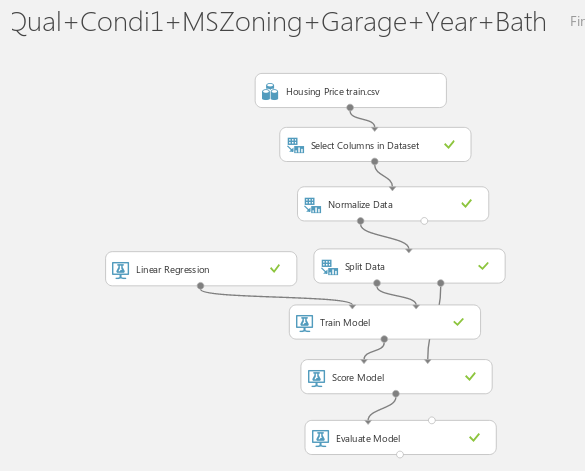

### Résultats sur AZURE

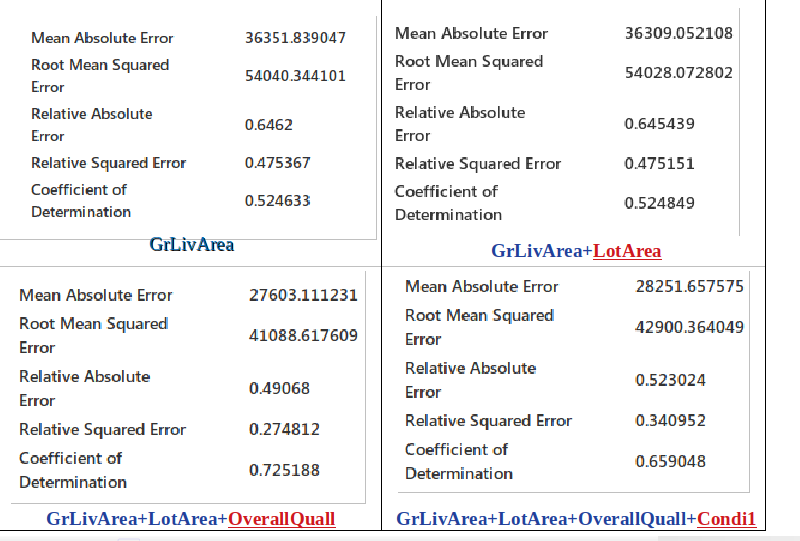

In [164]:
print(f"MSE for train with GrLivArea : %0.2f" % mse)
print(f"MSE for train with GrLivArea + LotArea : %0.2f" % mse_2)
print(f"MSE for train with GrLivArea + LotArea + OverallQual : %0.2f" % mse_3)
print(f"MSE for train with GrLivArea + LotArea + OverallQual + Condition1 : %0.2f" % mse_4)

MSE for train with GrLivArea : 56448.32
MSE for train with GrLivArea + LotArea : 56354.11
MSE for train with GrLivArea + LotArea + OverallQual : 40850.91
MSE for train with GrLivArea + LotArea + OverallQual + Condition1 : 33450.66


In [165]:
print(f"MSE for test with GrLivArea : %0.2f" % mse_predict)
print(f"MSE for test with GrLivArea + LotArea : %0.2f" % mse_test_2)
print(f"MSE for test with GrLivArea + LotArea + OverallQual : %0.2f" % mse_test_3)
print(f"MSE for test with GrLivArea + LotArea + OverallQual + Condition1 : %0.2f" % mse_test_4)

MSE for test with GrLivArea : 57360.75
MSE for test with GrLivArea + LotArea : 56755.47
MSE for test with GrLivArea + LotArea + OverallQual : 37052.54
MSE for test with GrLivArea + LotArea + OverallQual + Condition1 : 35643.27


In [166]:
print(f"R2 for test with GrLivArea : %0.2f" % R2)
print(f"R2 for test with GrLivArea + LotArea : %0.2f" % R2_2)
print(f"R2 for test with GrLivArea + LotArea + OverallQual : %0.2f" % R2_3)
print(f"R2 for test with GrLivArea + LotArea + OverallQual + Condition1 : %0.2f" % R2_4)

R2 for test with GrLivArea : 0.53
R2 for test with GrLivArea + LotArea : 0.54
R2 for test with GrLivArea + LotArea + OverallQual : 0.80
R2 for test with GrLivArea + LotArea + OverallQual + Condition1 : 0.82


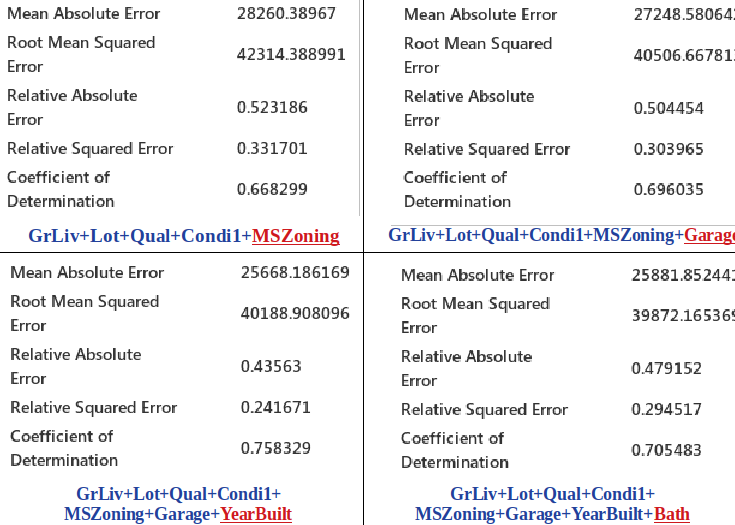

In [167]:
print(f"MSE for train with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning : %0.2f" % mse_5)
print(f"MSE for train with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars : %0.2f" % mse_6)
print(f"MSE for train with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars + YearBuilt: %0.2f" % mse_7)
print(f"MSE for train with GrLivArea + LotArea + OverallQual + Condition1+ MSZoning + GarageCars + YearBuilt +FullBath: %0.2f" % mse_8)

MSE for train with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning : 32160.48
MSE for train with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars : 30575.29
MSE for train with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars + YearBuilt: 30192.02
MSE for train with GrLivArea + LotArea + OverallQual + Condition1+ MSZoning + GarageCars + YearBuilt +FullBath: 30092.45


In [168]:
print(f"MSE for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning : %0.2f" % mse_test_5)
print(f"MSE for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars : %0.2f" % mse_test_6)
print(f"MSE for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars + YearBuilt: %0.2f" % mse_test_7)
print(f"MSE for test with GrLivArea + LotArea + OverallQual + Condition1+ MSZoning + GarageCars + YearBuilt +FullBath: %0.2f" % mse_test_8)

MSE for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning : 35275.34
MSE for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars : 33522.53
MSE for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars + YearBuilt: 33596.18
MSE for test with GrLivArea + LotArea + OverallQual + Condition1+ MSZoning + GarageCars + YearBuilt +FullBath: 33686.48


In [169]:
print(f"R2 for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning : %0.2f" % R2_5)
print(f"R2 for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars : %0.2f" % R2_6)
print(f"R2 for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars + YearBuilt: %0.2f" % R2_7)
print(f"R2 for test with GrLivArea + LotArea + OverallQual + Condition1+ MSZoning + GarageCars + YearBuilt +FullBath: %0.2f" % R2_8)

R2 for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning : 0.82
R2 for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars : 0.84
R2 for test with GrLivArea + LotArea + OverallQual + Condition1 + MSZoning + GarageCars + YearBuilt: 0.84
R2 for test with GrLivArea + LotArea + OverallQual + Condition1+ MSZoning + GarageCars + YearBuilt +FullBath: 0.84


# CONCLUSION